# Create animations with GEE data

## Methodology

**Datasets**

- **[Harmonized Sentinel-2 MSI: MultiSpectral Instrument, Level-2A](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED)**


- **[USGS Landsat 9 Level 2, Collection 2, Tier 1](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T1_L2)**


## Setup

### Library import

In [1]:
import sys

# Include local library paths 
sys.path.append("../src/")

from map_interaction import LeafletMap 
from data_search import GEECatalog
from data_extraction import GEEExtractor

## Data  acquisition
### Draw a rectangle on map to select and area

In [2]:
geometry = {'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-16.708832, 28.176139],
      [-16.708832, 28.519383],
      [-16.300964, 28.519383],
      [-16.300964, 28.176139],
      [-16.708832, 28.176139]]]}}]}

In [3]:
map = LeafletMap(geometry=geometry)
map

Draw a rectangle on map to select and area.


LeafletMap(center=[28.347760999999995, -16.504898], controls=(ZoomControl(options=['position', 'zoom_in_text',…

### Search images on the GEE Catalog

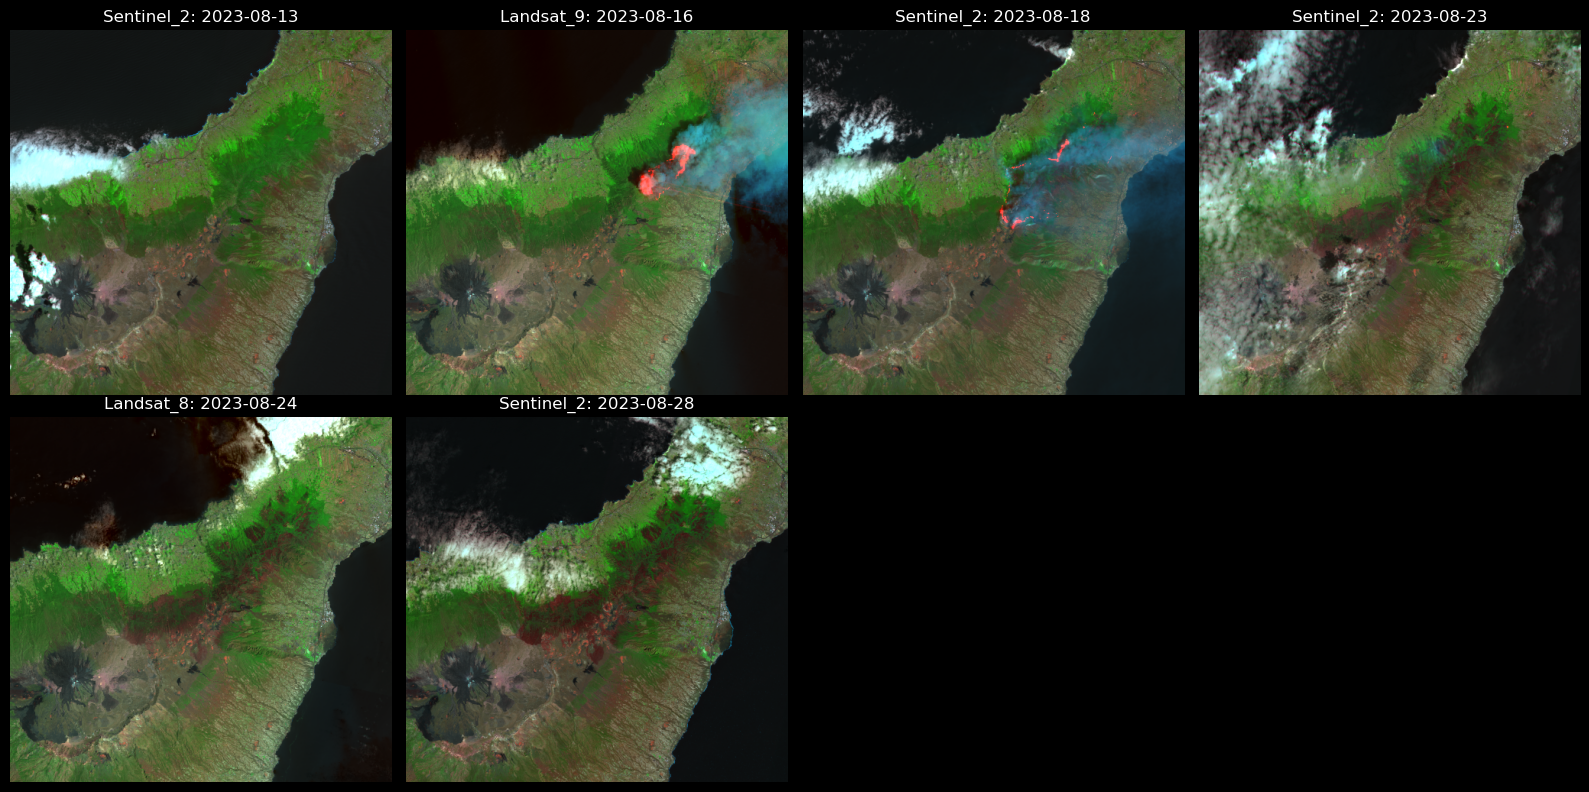

In [4]:
# Create and instance of a GEE catalog
gee_catalog = GEECatalog()

# Search for images of interest:
images = gee_catalog.search_images(geometry=map.geometry, start_date='2023-08-13', end_date='2023-08-31')

# Display thumnails in a single plot
gee_catalog.display_thumbnails(images)

### Extracting composites from GEE

In [5]:
# Select images
dates = ['2023-08-13', '2023-08-16', '2023-08-18', '2023-08-28']
selected_images = {date: images[date] for date in dates}

# Initialize GEEExtractor
gee_extractor = GEEExtractor(selected_images, map.geometry)

# Get composites
composites = gee_extractor.get_composites(scale=30)

# Add text
composites = gee_extractor.add_text(composites)

# Display composites
gee_extractor.display_composites(composites)

interactive(children=(IntSlider(value=0, description='frame', max=3), Output()), _dom_classes=('widget-interac…

<Figure size 640x480 with 0 Axes>

In [6]:
# Save frames as PNGs
folder_path = '../data/processed/animations'
region_name = 'Tenerife'
gee_extractor.save_frames_as_pngs(composites, folder_path, region_name)

# Create animation
gee_extractor.create_animation(folder_path, region_name, output_format = 'mp4')

Folder '../data/processed/animations/Tenerife' already exists.
Saved frame_0.png
Saved frame_1.png
Saved frame_2.png
Saved frame_3.png
All frames saved as PNG images.
Processing: ffmpeg -framerate 1 -i ../data/processed/animations/Tenerife/Tenerife_%03d.png -c:v libx264 -crf 0 -y ../data/processed/animations/Tenerife/Tenerife.mp4


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

Task created
Finished processing


frame=    4 fps=0.0 q=-1.0 Lsize=    7329kB time=00:00:03.00 bitrate=20011.6kbits/s speed=5.98x    
video:7328kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.011314%
[libx264 @ 0x55d2961bd3c0] frame I:1     Avg QP: 0.00  size:1979962
[libx264 @ 0x55d2961bd3c0] frame P:3     Avg QP: 0.00  size:1841058
[libx264 @ 0x55d2961bd3c0] mb I  I16..4: 80.9%  0.0% 19.1%
[libx264 @ 0x55d2961bd3c0] mb P  I16..4: 72.3%  0.0% 13.6%  P16..4: 11.1%  1.6%  1.4%  0.0%  0.0%    skip: 0.0%
[libx264 @ 0x55d2961bd3c0] coded y,u,v intra: 99.3% 75.7% 80.5% inter: 100.0% 98.6% 99.5%
[libx264 @ 0x55d2961bd3c0] i16 v,h,dc,p: 56% 43%  2%  0%
[libx264 @ 0x55d2961bd3c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 35% 33%  8%  4%  5%  4%  4%  4%  4%
[libx264 @ 0x55d2961bd3c0] Weighted P-Frames: Y:100.0% UV:100.0%
[libx264 @ 0x55d2961bd3c0] ref P L0: 14.5% 21.1% 10.6% 33.4% 20.5%
[libx264 @ 0x55d2961bd3c0] kb/s:15006.27
